In [8]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
df = pd.read_csv('./translation_evaluation_results_translation_target.csv')
smaller_df = df[['model','name', 'aurc', 'f1', 'precision', 'recall', 'acc']]
smaller_df.to_csv('./translation_evaluation_results_without_lists.csv')

In [10]:
df.head()

,Unnamed: 0,model,name,aurc,f1,precision,recall,acc,risk_list,coverage_list,label_distribution
0,0,anon/deberta-v3-large-dapt-tapt-scien...,dapt-tapt,0.493632,0.570808,0.504608,0.657,0.5060,"[1.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.33...","[0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, ...","[('LABEL_1', 1), ('LABEL_0', 0), ('LABEL_0', 0..."
1,1,anon/deberta-v3-large-finetuned-synth...,multiclass,0.513107,0.656250,0.502660,0.945,0.5050,"[1.0, 0.5, 0.6666666666666666, 0.5, 0.6, 0.666...","[0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, ...","[('LABEL_3', 1), ('LABEL_3', 1), ('LABEL_3', 1..."
2,2,anon/deberta-v3-large-finetuned-dagpa...,dagpap22only,0.479812,0.519752,0.495913,0.546,0.4955,"[0.0, 0.0, 0.3333333333333333, 0.5, 0.4, 0.5, ...","[0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, ...","[('LABEL_0', 0), ('LABEL_0', 0), ('LABEL_0', 0..."
3,3,anon/deberta-v3-large-finetuned-synth...,translated-only,0.413997,0.664655,0.500000,0.991,0.5000,"[0.0, 0.0, 0.0, 0.0, 0.2, 0.3333333333333333, ...","[0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, ...","[('LABEL_1', 1), ('LABEL_1', 1), ('LABEL_1', 1..."
4,4,anon/deberta-v3-large-finetuned-DAGPa...,all,0.456926,0.656184,0.504296,0.939,0.5080,"[0.0, 0.0, 0.3333333333333333, 0.5, 0.6, 0.5, ...","[0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, ...","[('LABEL_1', 1), ('LABEL_1', 1), ('LABEL_1', 1..."


In [11]:
test_df = pd.read_csv("../data/fake_papers_translated.csv")
test_df['pred'] = test_df["fake"].apply(lambda x: 3 if x == 1 else 2) # translated and real labels

In [12]:
label_map = {
    'LABEL_0': 0,
    'LABEL_1': 1,
    'LABEL_2': 2,
    'LABEL_3': 3
}
y_pred = [label_map[item[0]] for item in eval(df[df['name'] == 'multiclass']['label_distribution'][1]) ]
y_true = list(test_df['pred'])
cm = confusion_matrix(y_true, y_pred)

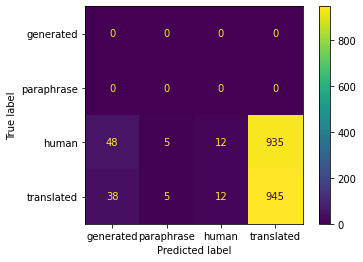

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["generated",
    "paraphrase",
    "human",
    "translated" ]
)
disp.plot()

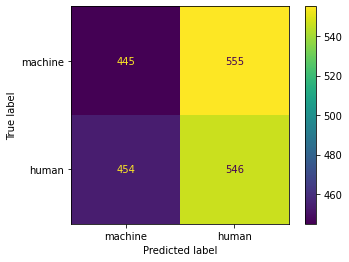

In [14]:
y_pred = [label_map[item[0]] for item in eval(df[df['name'] == 'dagpap22only']['label_distribution'][2]) ]
y_true = list(test_df['fake'])
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "machine",
    "human" ]
)
plt = disp.plot()